In [5]:
#Importing necessary Libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
 # Load the dataset

#Dataset example file: customer data.csv

dataset_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv" # Replace with actu

df= pd.read_csv(dataset_url)


In [7]:
#Display the first few rows of the dataset

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [8]:

# Display basic information about the dataset

print("\nDataset Info:")

print(df.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
#Check for missing values

print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [11]:
# Select relevant columns (e.g., Age, Annual Income, Spending Score)

# For illustration, we assume columns ['sepal_Length', 'sepal_width', 'petal_length'] are used for clusteri

features=df[['sepal_length', 'sepal_width', 'petal_length']]

# Standardize the data

scaler= StandardScaler()

scaled_features=scaler.fit_transform(features)

# Display the first few rows of the standardized data

print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])


First 5 rows of scaled features:
[[-0.90068117  1.01900435 -1.34022653]
 [-1.14301691 -0.13197948 -1.34022653]
 [-1.38535265  0.32841405 -1.39706395]
 [-1.50652052  0.09821729 -1.2833891 ]
 [-1.02184904  1.24920112 -1.34022653]]


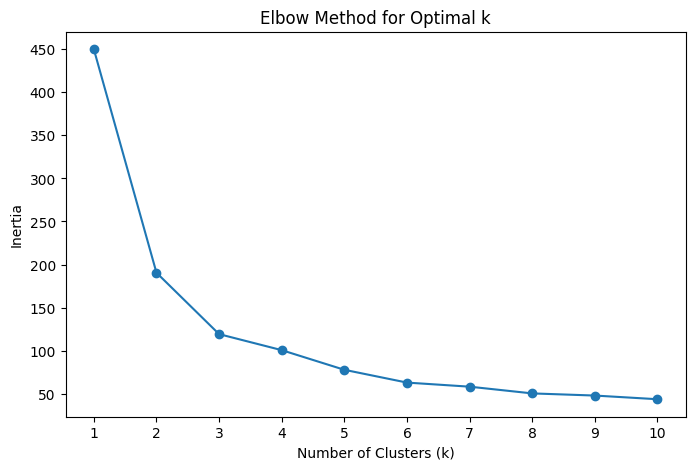

In [12]:
# Elbow Method to find the optimal number of clusters

inertia = []

k_range= range(1, 11)

for k in k_range:
    kmeans =KMeans (n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)

    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph

plt.figure(figsize=(8, 5))

plt.plot(k_range, inertia, marker='o')

plt.title('Elbow Method for Optimal k')

plt.xlabel('Number of Clusters (k)')

plt.ylabel('Inertia')

plt.xticks(k_range)
plt.show()

In [13]:
# Perform K-Means clustering with the optimal k (from the elbow method, assume k=3 here)

optimal_k=3

kmeans= KMeans (n_clusters= optimal_k, random_state=42)

cluster_labels=kmeans.fit_predict(scaled_features)

# Add cluster Labels to the original dataset

df['Cluster'] = cluster_labels

# Display the first few rows with cluster Labels

print("\nFirst 5 rows with cluster labels:")

print(df.head())


First 5 rows with cluster labels:
   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        2
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        2


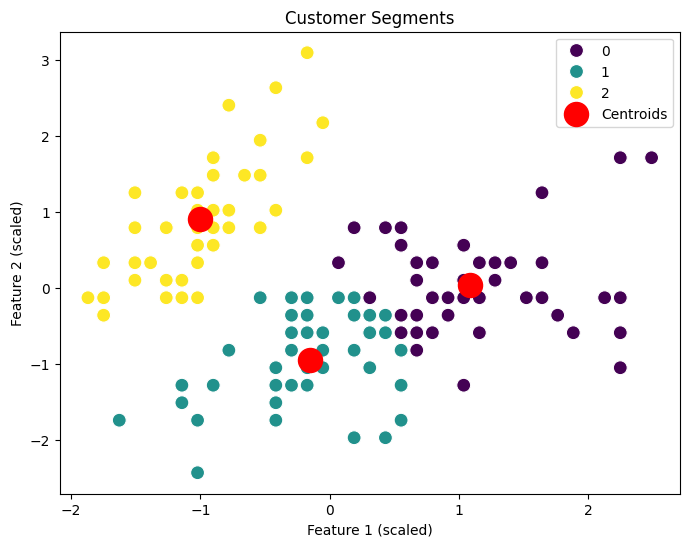

In [14]:
# Visualize clusters (using the first two features for plotting)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue =cluster_labels, palette='viridis', s=100)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.title('Customer Segments')

plt.xlabel('Feature 1 (scaled)')

plt.ylabel('Feature 2 (scaled)')


plt.legend()

plt.show()